## 0 Task 3 Setup
### 1 PySpark Environment Setting

In [ ]:
# Please run this cell to get Java and spark installed
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install pyspark==2.4.7

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad

### 2 Enter your NAME and ID


In [ ]:
# Please enter your NAME and student ID
NAME = "Vasista KOndapalli"
ID = "1111188"

### 3 Add data file

In [ ]:
# Make sure you have relevant data files uploaded, replace 'text_file_name.csv' with your csv file
# And then use the correct data file names below
datafile = "/content/drive/MyDrive/Data Folder /archive (3)/marketing_campaign.csv"

### 4 Connect GDrive for data set files

In [ ]:
# Mount the cloud folder for data file storage
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


### 5 Run Imports

In [ ]:
# Imports utilised
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression 
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
import numpy as np 
import pandas as pd
import plotly as py
import seaborn as sns
import statistics as stat
from datetime import date
import plotly.express as px
import plotly.graph_objs as go
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

### 6 Create Spark Session

In [ ]:
# Create Spark Session

sc = SparkSession.builder\
        .master('local[*]') \
        .appName('ICT707_Task3') \
        .getOrCreate()


### 7 Load CSV File

In [ ]:
# file should display the head() records without errors 
# Loading csv file for PySpark and Python 3
data = sc.read.csv(datafile, inferSchema = True, header = True)
data.head(5)

[Row(ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response='5524\t1957\tGraduation\tSingle\t58138\t0\t0\t04-09-2012\t58\t635\t88\t546\t172\t88\t88\t3\t8\t10\t4\t7\t0\t0\t0\t0\t0\t0\t3\t11\t1'),
 Row(ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response='2174\t1954\tGraduation\tSingle\t46344\t1\t1\t08-03-2014\t38\t11\t1\t6\t2\t1\t6\t2\t1\t1\t2\t5\t0\t0\t0\t0\t0\t0\t3\t11\t0'),
 Row(ID

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1 Exploratory Data Analysis
##### • telling its number of rows and columns,
##### • doing the data cleaning (missing values or duplicated records) if necessary
##### • selecting 3 columns, and drawing 1 plot (e.g. bar chart, histogram, boxplot, etc.) for each to summarise it

### 1.1 EDA - Description

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [ ]:
# To be able to visualise the data, the dataframe must be transferred to pandas
data = pd.read_csv(datafile, sep="\t")
print("Number of datapoints:", len(data))
print('data number of ROWS and Columns are ',data.shape)

Number of datapoints: 2240
data number of ROWS and Columns are  (2240, 29)


### 1.2 EDA - Cleaning

#### 1- Missing values

In [ ]:
# which column has a missing values
data.columns[data.isnull().any()]

Index(['Income'], dtype='object')

In [ ]:
#sum missing data in rows
sum([True for idx,row in data.iterrows() if any(row.isnull())])

24

In [ ]:
# Here the missing values are :24 out of total 2240,so i will drop them
# they will not affect my result 
#the missing data are huge and string i cant use mean , but i will drop them
data.dropna(inplace=True)

In [ ]:
# check the data for any null
data.isnull().sum().any()

False

#### 2 - Check for Duplicates

In [ ]:
# Do my data have duplicate values, and if yes, how many? 
data.duplicated().sum()

0

#### 3- Fixing the data type, if a column have a wrong data type 


In [ ]:
data.head(5)

[Row(ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response='5524\t1957\tGraduation\tSingle\t58138\t0\t0\t04-09-2012\t58\t635\t88\t546\t172\t88\t88\t3\t8\t10\t4\t7\t0\t0\t0\t0\t0\t0\t3\t11\t1'),
 Row(ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response='2174\t1954\tGraduation\tSingle\t46344\t1\t1\t08-03-2014\t38\t11\t1\t6\t2\t1\t6\t2\t1\t1\t2\t5\t0\t0\t0\t0\t0\t0\t3\t11\t0'),
 Row(ID

In [ ]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### 1.3 EDA - Graphs

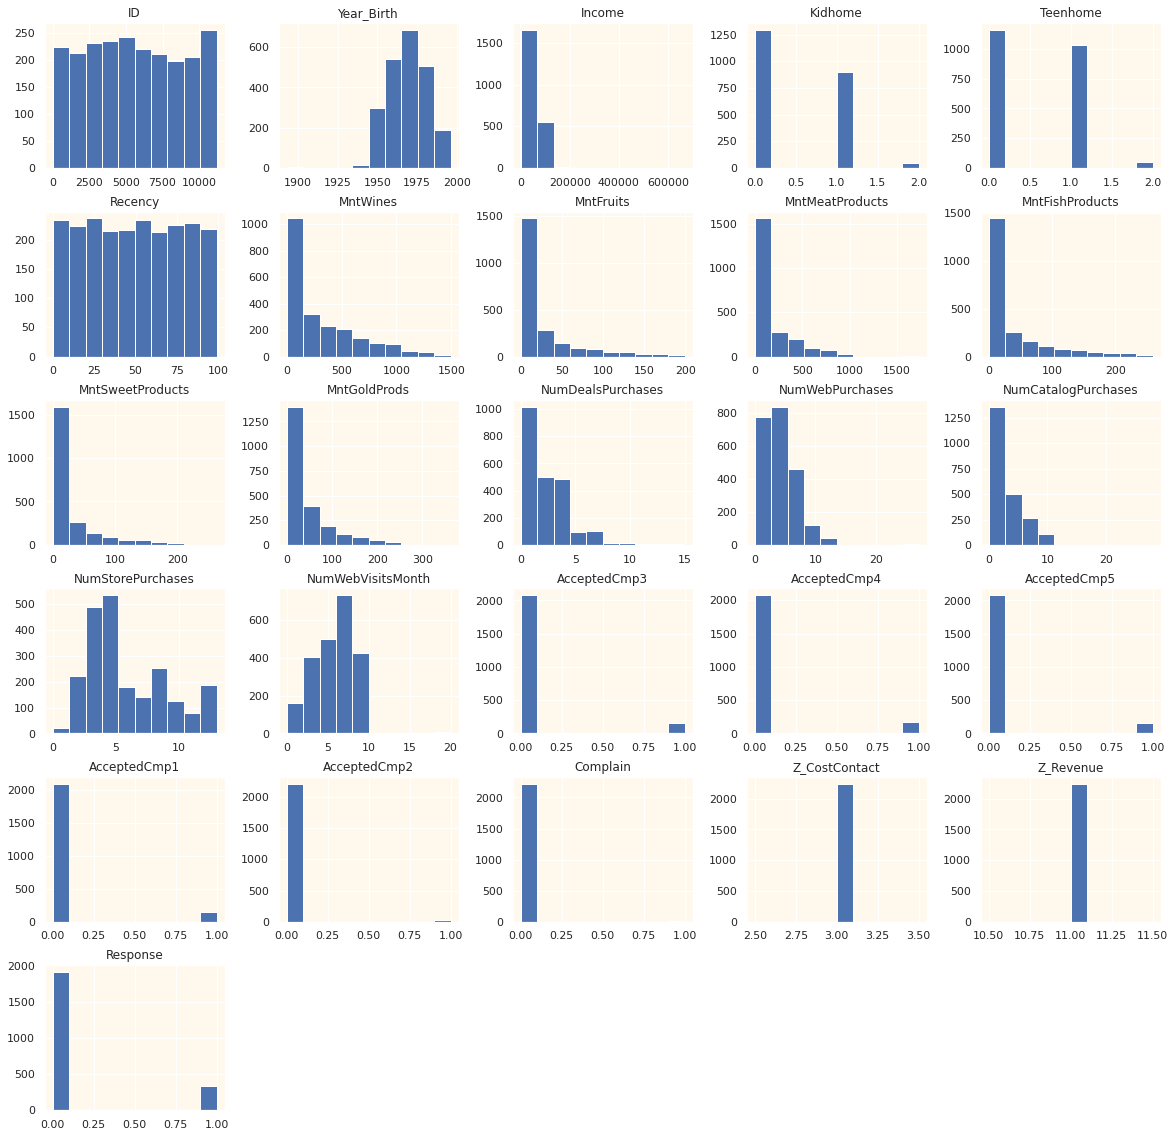

In [ ]:
#drawing a histogram for all the numeric data in my data set
# An over view through all data
data.hist(figsize=(20,20));

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


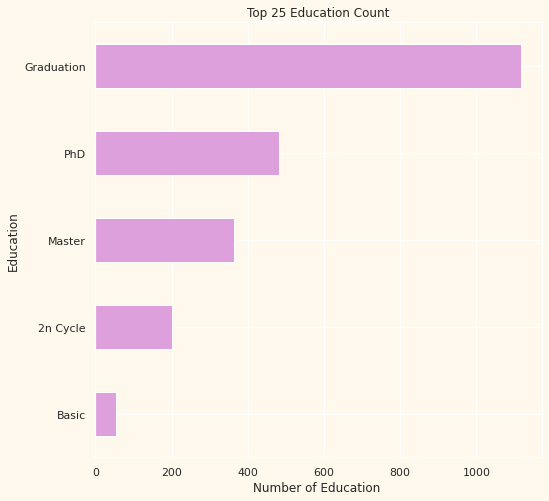

In [ ]:
#graph 2
top_25_income_Education = data['Education'].value_counts().nlargest(25)
# Bar Chart for top Educations by Income
from matplotlib import pyplot as plt

top_25_income_Education.sort_values(ascending=True).plot(kind='barh',figsize=(8,8),color='plum')
plt.title('Top 25 Education Count')
plt.xlabel('Number of Education ')
plt.ylabel('Education');

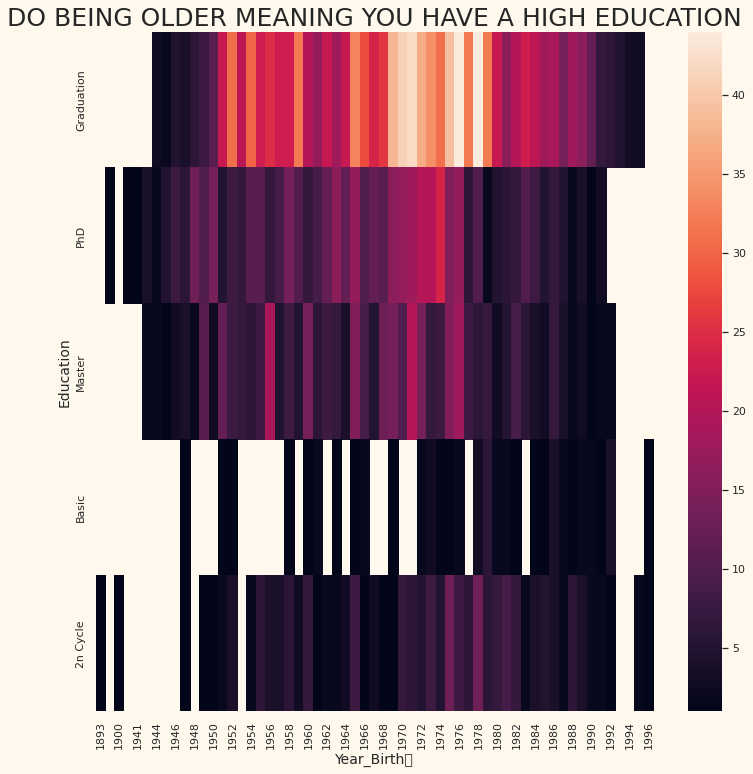

In [ ]:
# graph 3
# i will change year to object
data['Year_Birth'] = data['Year_Birth'].astype(object)

# is there anr relation between education and Year_Birth	

tmp_mydata = data.groupby([data['Education'].str.split('|').str[0],'Year_Birth'],sort=False)['Year_Birth'].agg(['count'])
tmp_mydata.head()

heatmap_df = pd.pivot_table(tmp_mydata, values ='count',index=['Education'],columns=['Year_Birth'])

fig, ax = plt.subplots(figsize=(12.5,12.5))
sns.heatmap(heatmap_df, ax=ax)
plt.xlabel('Year_Birth	', size=14)
plt.ylabel('Education',size=14)
plt.title('DO BEING OLDER MEANING YOU HAVE A HIGH EDUCATION',size=25);

In [ ]:
# graph 4


## 2 Recommendation Engine
#### This subtask requires you to implement a recommender system on Collaborative filtering with Alternative Least Squares Algorithm. 
#### You need to include
##### • Model training and predictions
##### • Model evaluation using MSE

In [ ]:
## here the other method: from the above drawing i will drop column less sinificate 
data.drop(['ID', 'Year_Birth','Kidhome',	'Teenhome','NumWebVisitsMonth',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp1','AcceptedCmp2',	'Complain'], axis=1,inplace= True)

In [ ]:
# Splitting the data into Training and Test data that is used for both Task I.2 and Task I.3
# hint: training_data, testing_data = data.randomSplit([???,???])
x=data.iloc[:, :-1].values
y=data.iloc[:,3].values

In [ ]:
data1=data
data1.drop(['Response'], axis=1,inplace= True)

In [ ]:
preprocessed_X =  pd.get_dummies(data1)


In [ ]:
# Removing Outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

for col in preprocessed_X.columns:
    has_outliers(preprocessed_X, col)

def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(preprocessed_X, preprocessed_X.columns)

# Check if there still outliers
for col in preprocessed_X.columns:
    has_outliers(preprocessed_X, col)

Income yes
Income no
Recency no
MntWines yes
MntWines no
MntFruits yes
MntFruits no
MntMeatProducts yes
MntMeatProducts no
MntFishProducts yes
MntFishProducts no
MntSweetProducts yes
MntSweetProducts no
MntGoldProds yes
MntGoldProds no
NumDealsPurchases yes
NumDealsPurchases no
NumWebPurchases yes
NumWebPurchases no
NumCatalogPurchases yes
NumCatalogPurchases no
NumStorePurchases no
AcceptedCmp5 yes
AcceptedCmp5 no
Z_CostContact no
Z_Revenue no
Education_2n Cycle yes
Education_2n Cycle no
Education_Basic yes
Education_Basic no
Education_Graduation no
Education_Master yes
Education_Master no
Education_PhD yes
Education_PhD no
Marital_Status_Absurd yes
Marital_Status_Absurd no
Marital_Status_Alone yes
Marital_Status_Alone no
Marital_Status_Divorced yes
Marital_Status_Divorced no
Marital_Status_Married no
Marital_Status_Single yes
Marital_Status_Single no
Marital_Status_Together no
Marital_Status_Widow yes
Marital_Status_Widow no
Marital_Status_YOLO yes
Marital_Status_YOLO no
Dt_Customer_

In [ ]:
from sklearn.model_selection import train_test_split
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(preprocessed_X,y,test_size=0.40, random_state=42)
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test,labels_validation_test, test_size=0.5,random_state=42)

In [ ]:
#Recommendation system using Alternative Least Squares Algorithm
# hint: als = ALS(maxIter=??,regParam=??,userCol = "???", itemCol = "???", ratingCol = "???", coldStartStrategy = "???")
# hint: model = als.fit(???)
# Creating Interaction Matrices
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Evaluate the model using Mean Square Error
# hint: predictions = model.transform(????)
# hint: evaluator = RegressionEvaluator(?????)
# hint: mse = evaluator.evaluate(????)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[373.71 272.  ]
 [337.65  24.  ]
 [341.9  548.  ]
 [341.45 269.  ]
 [331.53 244.  ]
 [320.82 427.  ]
 [325.36 427.  ]
 [297.19 352.  ]
 [328.23 612.  ]
 [345.41 244.  ]
 [340.67 113.  ]
 [333.78  57.  ]
 [330.06 195.  ]
 [319.22 440.  ]
 [337.51 355.  ]
 [330.6  216.  ]
 [317.79 418.  ]
 [303.61 141.  ]
 [324.27 448.  ]
 [343.55 591.  ]
 [343.14 220.  ]
 [299.29  78.  ]
 [323.92 631.  ]
 [321.94 381.  ]
 [331.32  93.  ]
 [326.67 500.  ]
 [340.02 135.  ]
 [326.82 472.  ]
 [292.17 462.  ]
 [344.84 593.  ]
 [325.64 657.  ]
 [330.28 482.  ]
 [337.21 389.  ]
 [346.43 328.  ]
 [325.97 590.  ]
 [305.88 432.  ]
 [324.73 602.  ]
 [317.22  17.  ]
 [310.88 569.  ]
 [330.75 255.  ]
 [349.86 604.  ]
 [341.19 468.  ]
 [344.43 285.  ]
 [323.43 325.  ]
 [323.21 507.  ]
 [346.52 372.  ]
 [336.58   7.  ]
 [321.21 373.  ]
 [300.34 200.  ]
 [343.24 375.  ]
 [347.93 394.  ]
 [324.96  13.  ]
 [352.13 603.  ]
 [337.14 296.  ]
 [323.37 423.  ]
 [347.02 339.  ]
 [349.05 269.  ]
 [336.54 546.  ]
 [321.66 580. 

## 3 Classification
#### This subtask requires you to implement a classification system with Logistic regression. 
#### You need to include
##### • Logistic Regression model training
##### • Model evaluation


In [ ]:
# Logistic Regression
# hint: assembler = VectorAssembler().setInputCols([???????,????]).setOutputCol(????)
# hint: train_vector = assembler.transform(?????)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0).fit(features_train,labels_train)
print(lr_model.score(features_validation,labels_validation))

0.004514672686230248


In [ ]:
# Test the model
# hint: test_vector = assembler.transform(testing)
# hint: test_vector = test_vector.select("features", "label")
# hint: test_vector = lr_model.transform(test_vector)
# hint:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0).fit(features_train,labels_train)
print(lr_model.score(features_validation,labels_validation))

0.004514672686230248


In [ ]:
# Model Evaluation using Root Mean Square Error (RMSE)
# hint: rmse_test = evaluator.evaluate(?????, {evaluator.metricName: "rmse"})
# hint: rmse_train = evaluator.evaluate(?????, {evaluator.metricName: "rmse"})
#print("RMSE for Test:",rmse_test)
#print("RMSE for Train:",rmse_train)
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(features_train, labels_train)
gb_model.score(features_test, labels_test)

0.0045045045045045045

## Shut down SparkContext when exiting

If you have error messages related to sparkContext, try to run the following cell, and then rerun all cells.

In [ ]:
sc.stop()